In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
# geodata source
gd_src = '../geodata/{}/{}-c005-s010-vw-pr.geojson'

# name corrected data source
nc_src = '../well_data/src_data.csv'

In [3]:
geodata = gpd.read_file(gd_src.format('mou', 'mou'))
wells = pd.read_csv(nc_src)
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868678 entries, 0 to 868677
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Division  868678 non-null  object 
 1   District  868678 non-null  object 
 2   Upazila   868678 non-null  object 
 3   Union     868678 non-null  object 
 4   Mouza     868678 non-null  object 
 5   Depth     868678 non-null  float64
 6   Arsenic   868678 non-null  float64
dtypes: float64(2), object(5)
memory usage: 46.4+ MB


<GeoAxesSubplot: >

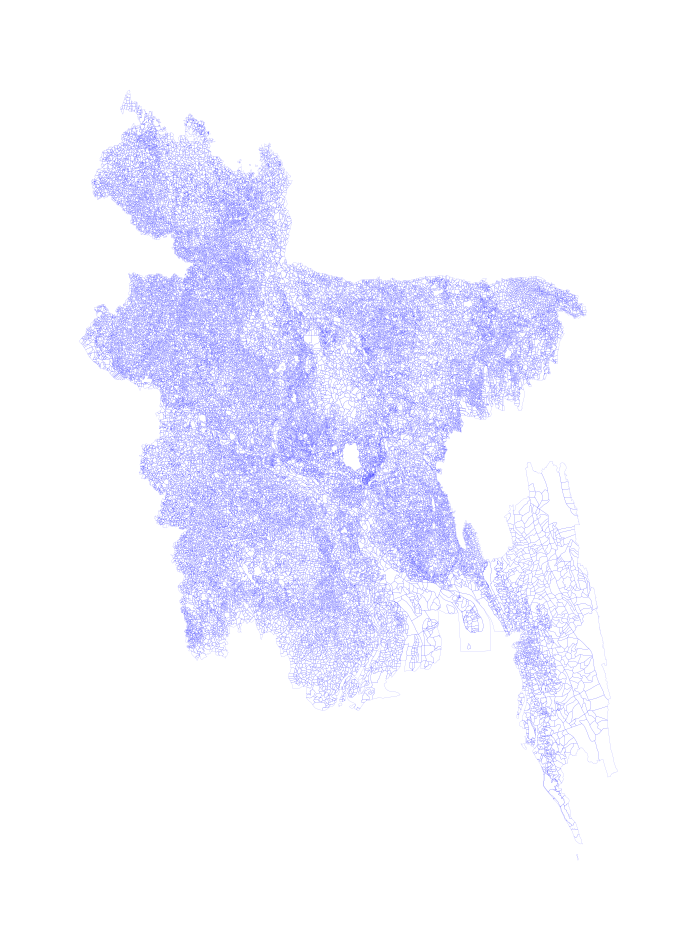

In [4]:
gplt.polyplot(
    geodata, 
    projection=gcrs.AlbersEqualArea(), 
    edgecolor='blue', 
    linewidth=0.05,
    figsize=(12,12)
)

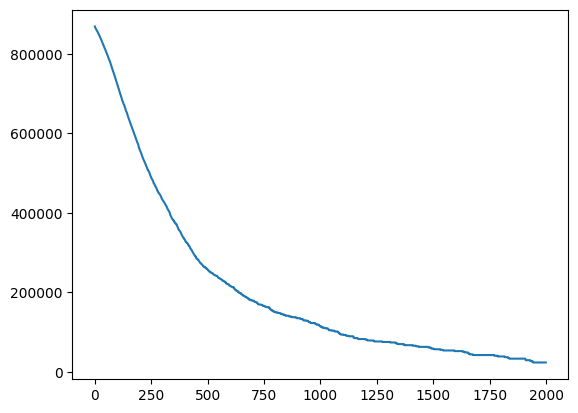

In [5]:
def chittagong_color_count(df_in):
    df = df_in.copy()
    
    df_agg = df.groupby(df['Mouza'], as_index=False).count()
    df_agg['mou_count'] = df_agg['Depth']
    df_agg.drop(columns=['Depth'])
    
    df['mou_count'] = pd.merge(
        df_agg[['Mouza', 'mou_count']],
        df,
        on='Mouza'
    )['mou_count']  

    data_points = []
    min_wells = []
    for x in range(0, 2000):
        data_points.append(len(df[df['mou_count'] > x]))
        min_wells.append(x)
        
    plt.plot(min_wells, data_points)
    plt.show()

    return

chittagong_color_count(wells)